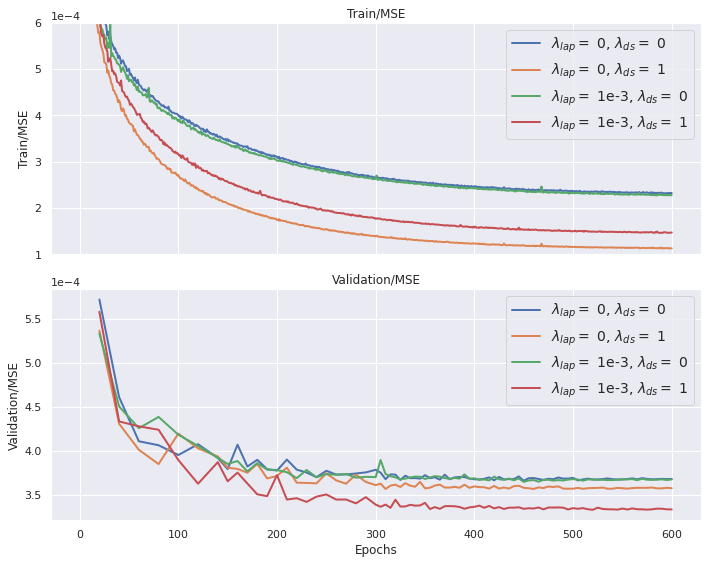

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.ticker as ticker

# Apply Seaborn style
sns.set()

# Increase only legend label font size
plt.rc('legend', fontsize=14)

# Define the event files and corresponding hyperparameters
events = [
    "weights/Surface/Old/surface_roi_ds_0_lap_0/events.out.tfevents.1686068826.ngaggion-pc53.832787.0",
    "weights/Surface/Old/surface_roi_ds_1_lap_0/events.out.tfevents.1686243988.ngaggion-pc53.1243304.0",
    "weights/Surface/Old/surface_roi_ds_0_lap_001/events.out.tfevents.1686591292.ngaggion-pc53.2037066.0",
    "weights/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/events.out.tfevents.1688679878.ngaggion-pc53.1894407.1"
]

laplacian_loss = [0, 0, "1e-3", "1e-3"]
ds_loss = [0, 1, 0, 1]

tag_names = ["Train/MSE", "Validation/MSE"]

# Create an EventAccumulator object for each event file
event_accs = []
for event_file in events:
    event_acc = event_accumulator.EventAccumulator(event_file)
    event_acc.Reload()
    event_accs.append(event_acc)

# Create subplots
fig, axes = plt.subplots(len(tag_names), 1, figsize=(10, 8), sharex=True)

# Plot the data for each event file
for i, tag_name in enumerate(tag_names):
    ax = axes[i]
    ax.set_ylabel(tag_name)

    # Plot the data for each event file
    for j, event_acc in enumerate(event_accs):
        steps = []
        values = []
        for scalar_event in event_acc.Scalars(tag_name):
            steps.append(scalar_event.step)
            values.append(scalar_event.value)
        
        # Create a legend based on the hyperparameters
        legend_label = r"$\lambda_{lap} =$ " + str(laplacian_loss[j]) + r", $\lambda_{ds} =$ " + str(ds_loss[j])
        ax.plot(steps, values, label=legend_label, linewidth=2)
        if tag_name == "Train/MSE":
            ax.set_ylim(0.0001, 0.0006)

    # Set the legend and title for the subplot
    ax.legend()
    ax.set_title(tag_name)
    
    # Format y-axis tick labels as scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
# Set the x-axis label for the last subplot
axes[-1].set_xlabel("Epochs")

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig("losses.png", dpi=300)

# Show the figure
plt.show()


In [11]:
# Calculate and print relative decrease for the last step
base_value = None
for j, event_acc in enumerate(event_accs):
    steps = []
    values = []
    for scalar_event in event_acc.Scalars(tag_names[0]):
        steps.append(scalar_event.step)
        values.append(scalar_event.value)
    
    if laplacian_loss[j] == 0 and ds_loss[j] == 0:
        base_value = values[-1]
    else:
        last_value = values[-1]
        relative_decrease = (base_value - last_value) / base_value
        print(f"Relative decrease for combination {laplacian_loss[j]}, {ds_loss[j]} at the last step: {relative_decrease}")


Relative decrease for combination 0, 1 at the last step: 0.5160063945636797
Relative decrease for combination 1e-3, 0 at the last step: 0.01830351926896611
Relative decrease for combination 1e-3, 1 at the last step: 0.3679683361547104


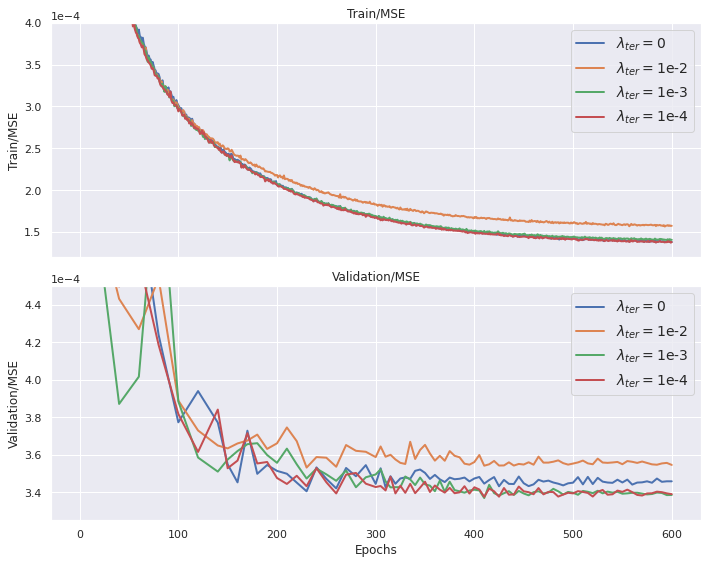

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.ticker as ticker

# Apply Seaborn style
sns.set()

plt.rc('legend', fontsize=14)

# Define the event files and corresponding hyperparameters
events = [
    "weights/Volumetric/VOL_ROI_DS_1_REG_0/events.out.tfevents.1689854329.ngaggion-pc53.1741953.0",
    "weights/Volumetric/VOL_ROI_DS_1_REG_0.01/events.out.tfevents.1690933207.ngaggion-pc53.3886355.0",
    "weights/Volumetric/VOL_ROI_DS_1_REG_0.001/events.out.tfevents.1690199796.ngaggion-pc53.2429785.0",
    "weights/Volumetric/VOL_ROI_DS_1_REG_0.0001/events.out.tfevents.1690566635.ngaggion-pc53.3158315.0"
]

regularizer_loss = ["0", "1e-2", "1e-3", "1e-4"]

tag_names = ["Train/MSE", "Validation/MSE"]

# Create an EventAccumulator object for each event file
event_accs = []
for event_file in events:
    event_acc = event_accumulator.EventAccumulator(event_file)
    event_acc.Reload()
    event_accs.append(event_acc)

# Create subplots
fig, axes = plt.subplots(len(tag_names), 1, figsize=(10, 8), sharex=True)

# Plot the data for each event file
for i, tag_name in enumerate(tag_names):
    ax = axes[i]
    ax.set_ylabel(tag_name)

    # Plot the data for each event file
    for j, event_acc in enumerate(event_accs):
        steps = []
        values = []
        for scalar_event in event_acc.Scalars(tag_name):
            steps.append(scalar_event.step)
            values.append(scalar_event.value)
        
        # Create a legend based on the hyperparameters
        legend_label = r"$\lambda_{ter} = $" + str(regularizer_loss[j])
        ax.plot(steps, values, label=legend_label, linewidth=2)
        if tag_name == "Train/MSE":
            ax.set_ylim(0.00012, 0.0004)
        else:
            ax.set_ylim(0.000325, 0.00045)

    # Set the legend and title for the subplot
    ax.legend(loc="upper right")
    ax.set_title(tag_name)
    
    # Format y-axis tick labels as scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
# Set the x-axis label for the last subplot
axes[-1].set_xlabel("Epochs")

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig("losses_volumetric.png", dpi=300)

# Show the figure
plt.show()
